In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r'C:\Users\itay\Desktop\לימודים\Data-Analyst\housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Drop the null values from the data 
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

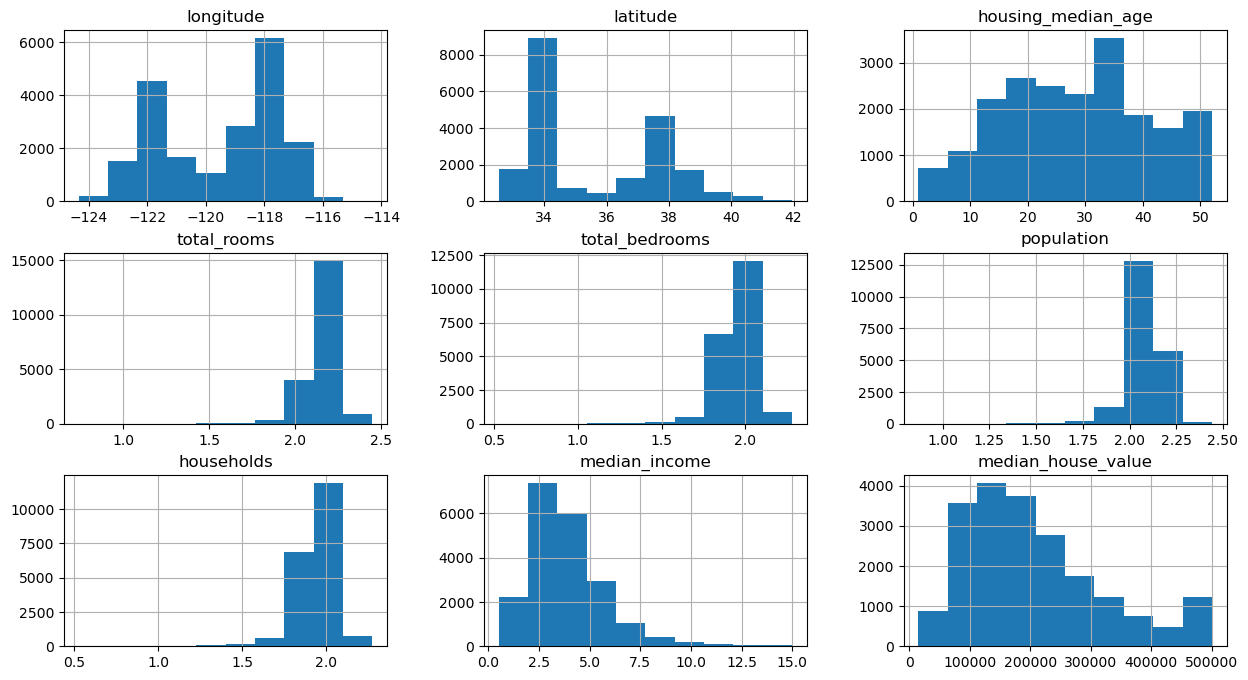

In [7]:
# log transform to make the data distribute normally 
log_transform_features = ['total_rooms', 'total_bedrooms', 'population', 'households']

for feature in log_transform_features:
    df[feature] = np.log(df[feature] + 1)
    
df.hist(figsize=(15,8))

In [8]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Explore relations between the features 

In [9]:
train_data = X_train.join(y_train)

<Axes: >

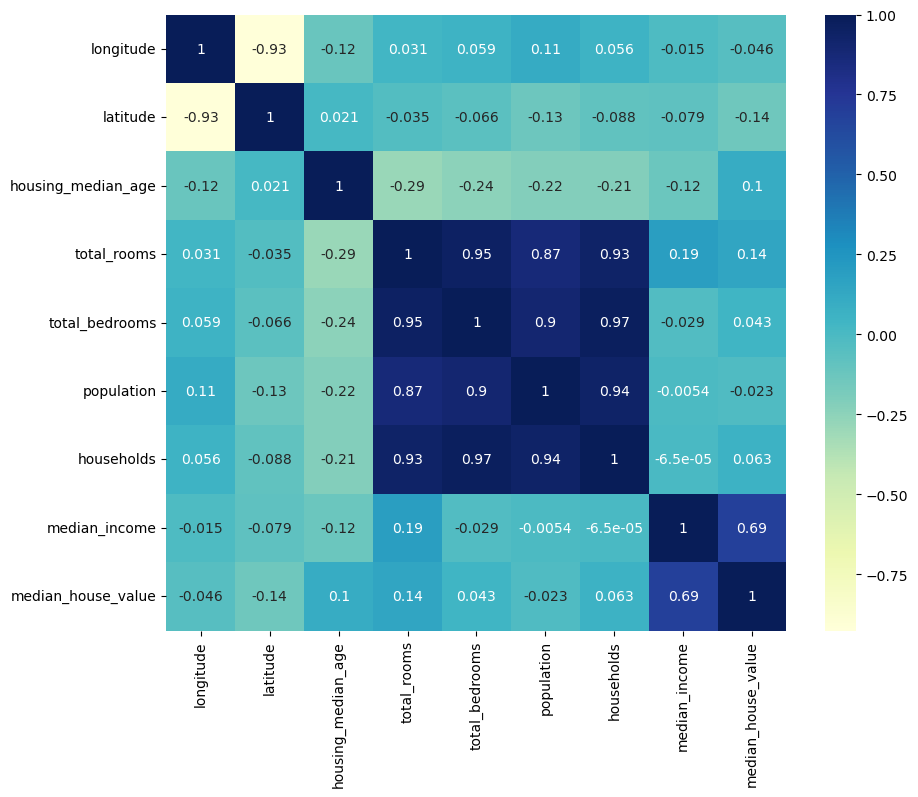

In [10]:
# plotting heatmap with correlations between the features 
plt.figure(figsize=(10,8))
sns.heatmap(train_data.drop('ocean_proximity',axis=1).corr(), annot=True, cmap='YlGnBu')

In [11]:
# Replace the categorical variable 'ocean_proximity' with 4 boolean fatures
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2329,-119.73,36.81,19.0,2.132791,1.928289,2.067210,1.933085,2.7778,79700.0,False,True,False,False,False
9892,-122.29,38.29,52.0,2.205690,2.029555,2.130750,2.016270,2.4398,163100.0,False,False,False,True,False
13645,-117.32,34.06,46.0,1.969559,1.728949,1.969559,1.708702,1.4511,73100.0,False,True,False,False,False
9007,-118.60,34.09,43.0,2.164392,1.957909,2.062801,1.943252,7.6091,438500.0,True,False,False,False,False
17355,-120.43,34.88,22.0,2.181088,1.938083,2.085364,1.934644,5.0113,158600.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,-118.19,34.06,32.0,1.990715,1.804211,2.030611,1.808267,1.9762,137500.0,True,False,False,False,False
18967,-122.03,38.25,35.0,2.148380,1.939208,2.088348,1.946112,3.1389,101100.0,False,True,False,False,False
14483,-117.26,32.82,34.0,2.269409,2.036920,2.140712,2.030435,8.4960,500001.0,False,False,False,False,True
14742,-117.06,32.58,13.0,2.212886,2.023381,2.137027,2.021691,3.4792,107600.0,False,False,False,False,True


In [12]:
test_data = X_test.join(y_test)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6867,-118.12,34.06,25.0,2.119991,1.940694,2.100953,1.936947,3.1892,214700.0,True,False,False,False,False
6818,-118.08,34.08,43.0,2.133969,1.945758,2.104549,1.939953,2.9688,211400.0,True,False,False,False,False
15382,-117.14,33.39,17.0,2.193776,1.998330,2.147837,1.979120,3.8547,208300.0,True,False,False,False,False
1982,-120.81,38.67,14.0,2.306142,2.124002,2.228102,2.115823,3.0565,118800.0,False,True,False,False,False
15334,-117.32,33.22,16.0,2.074948,1.864241,1.910860,1.856716,2.7417,91700.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,-122.18,38.29,18.0,2.149158,1.884566,2.013665,1.887391,8.0113,393000.0,False,False,False,True,False
13975,-116.76,34.23,10.0,2.238970,2.066572,2.070469,1.936184,2.6071,89000.0,False,True,False,False,False
4948,-118.30,34.02,42.0,2.172225,2.016072,2.169370,2.014272,1.6699,108000.0,True,False,False,False,False
13607,-117.25,34.15,22.0,2.300499,2.150521,2.242533,2.139017,2.1465,88800.0,False,True,False,False,False


In [13]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(x_test, y_test)

0.6820242839344999

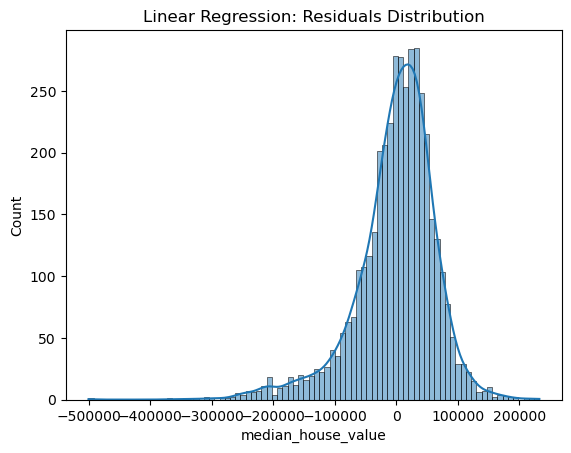

In [18]:
residuals = reg.predict(X_test) - y_test
sns.histplot(residuals, kde=True)
plt.title("Linear Regression: Residuals Distribution")
plt.show()

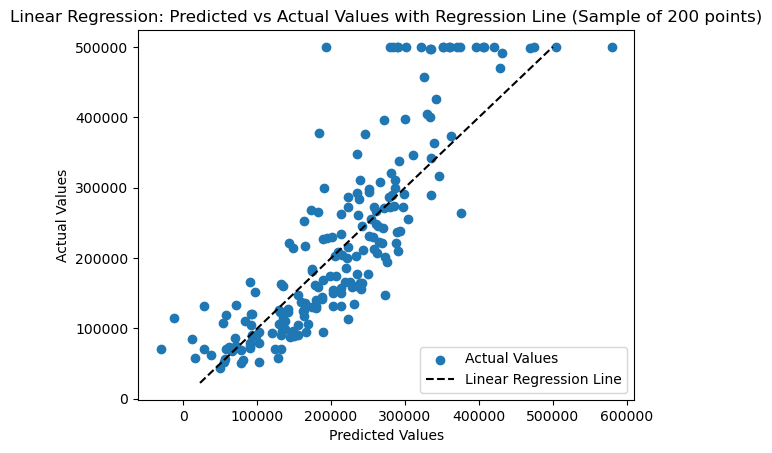

In [21]:
# Scatter plot of predicted vs actual values with the linear regression line
import random

# Set a random seed for reproducibility
random.seed(42)

# Specify the size of the sample 
sample_size = 200

# Randomly select a sample of data points
sample_indices = random.sample(range(len(y_test)), sample_size)

# Scatter plot of predicted vs actual values with the linear regression line for the sample
plt.scatter(reg.predict(X_test.iloc[sample_indices]), y_test.iloc[sample_indices], label='Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Linear Regression Line')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title(f"Linear Regression: Predicted vs Actual Values with Regression Line (Sample of {sample_size} points)")
plt.legend()
plt.show()

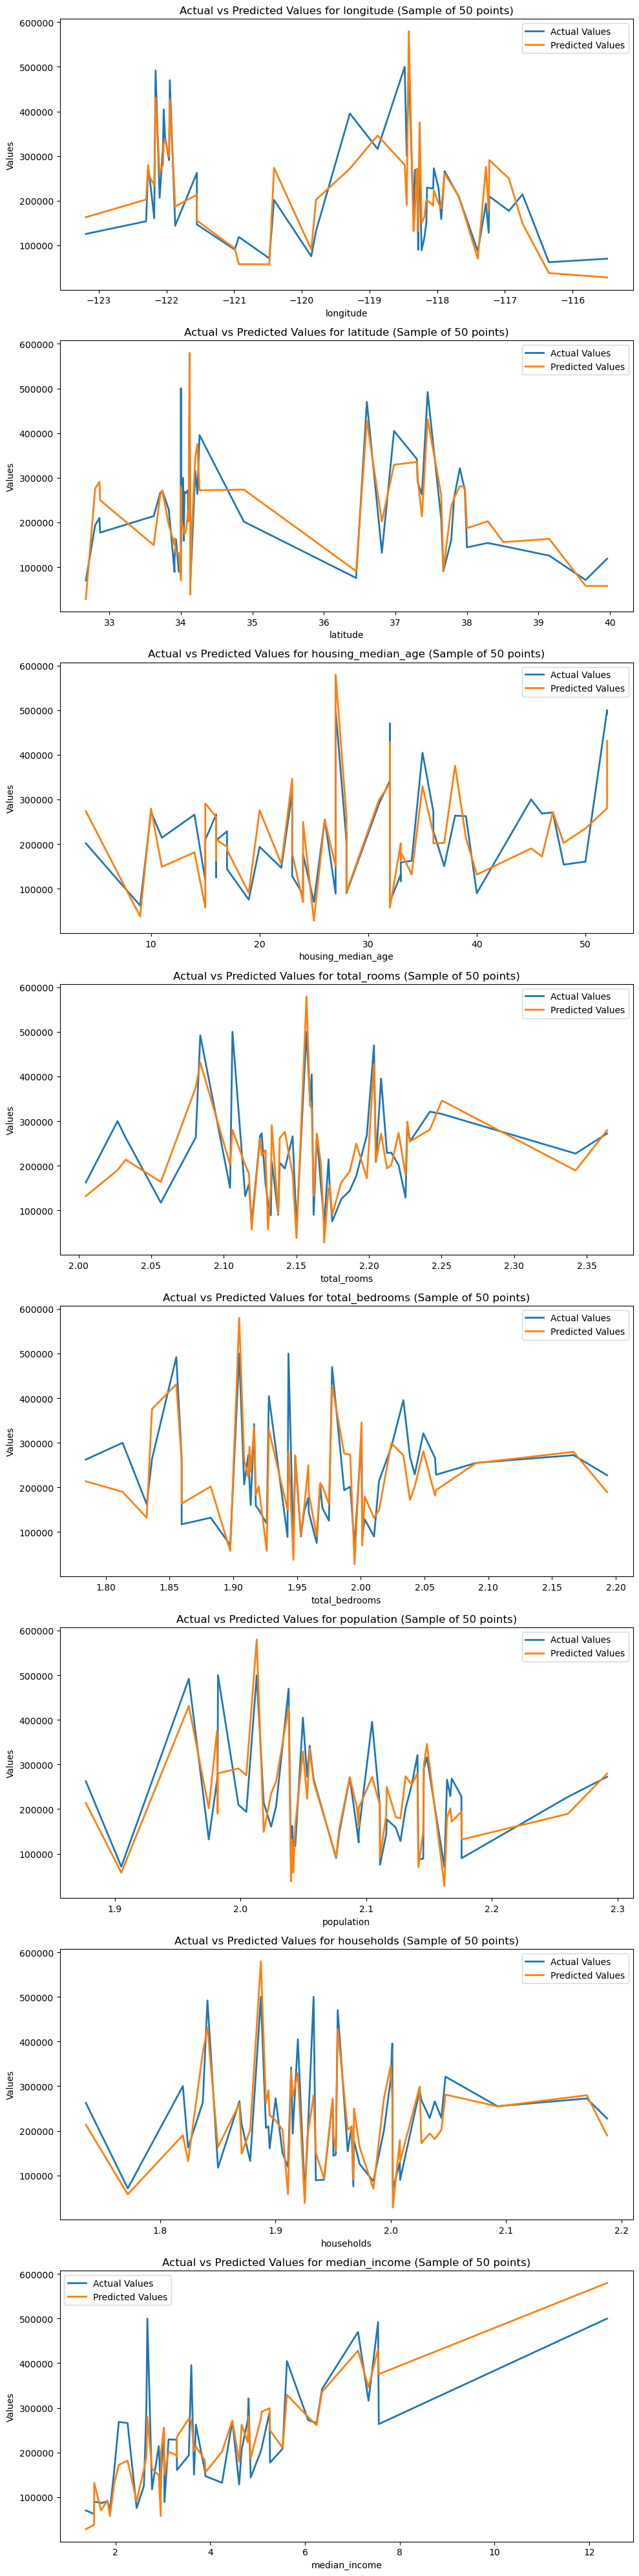

In [25]:
# Specify the features you want to visualize
features_to_visualize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_visualize), ncols=1, figsize=(10, 5 * len(features_to_visualize)))

# Set a random seed for reproducibility
random.seed(42)

# Specify the size of the sample 
sample_size = 50

# Randomly select a sample of data points
sample_indices = random.sample(range(len(y_test)), sample_size)

# Plot actual and predicted values for each feature using lines for the sample
for i, feature in enumerate(features_to_visualize):
    # Sort values for better line visualization
    sorted_indices = X_test[feature].iloc[sample_indices].argsort()
    
    # Plot line for actual values
    axes[i].plot(X_test[feature].iloc[sample_indices].iloc[sorted_indices], y_test.iloc[sample_indices].iloc[sorted_indices], label='Actual Values', linewidth=2)
    
    # Plot line for predicted values
    axes[i].plot(X_test[feature].iloc[sample_indices].iloc[sorted_indices], reg.predict(X_test.iloc[sample_indices].iloc[sorted_indices]), label='Predicted Values', linewidth=2)
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Values")
    axes[i].set_title(f"Actual vs Predicted Values for {feature} (Sample of {sample_size} points)")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Random forest regressor 

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

Mean Squared Error (Random Forest): 2283170083.768044
R-squared (Random Forest): 0.8315380187302952


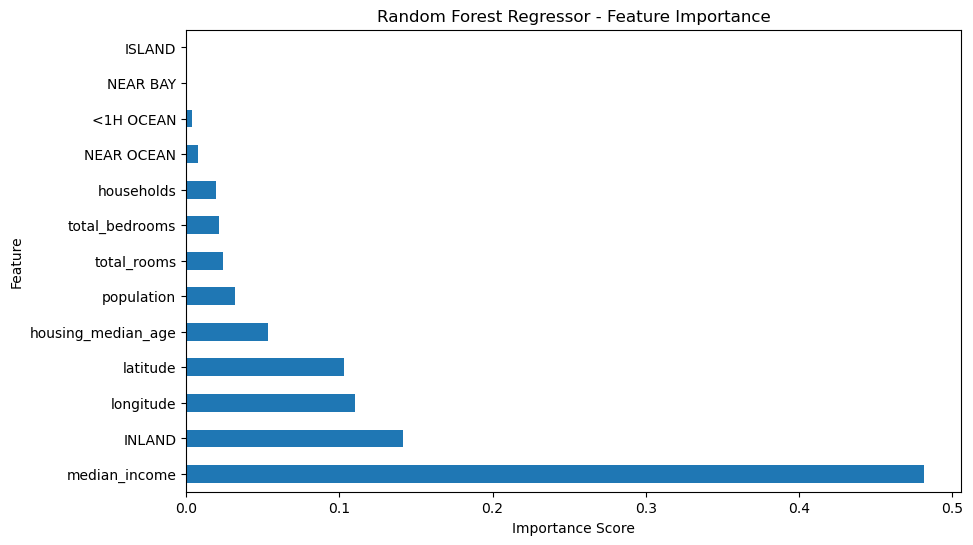

In [39]:
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

# Feature Importance
feature_importance = pd.Series(rf_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh')
plt.title('Random Forest Regressor - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [42]:
rf_reg.score(X_test, y_test)

0.8315380187302952

In [45]:
forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[100, 200, 300], 
    "min_samples_split":[2, 4],
    "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')